# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

#Importing this to automate the visualizations time created
from datetime import datetime

# Importing API key
import api_keys
#from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities

lat_lngs = []
cities = []
citylats = []
citylngs = []

# Creating a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identifying the nearest city for each lat and lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then place it on my cities list
    
    if city not in cities:
        cities.append(city)
        citylats.append(lat_lng[0])
        citylngs.append(lat_lng[1])

# Printing the city count to confirm if we have enough cities captured in the list
print(f"There are {len(cities)} cities saved")
print(f"There are {len(citylats)} lats saved")

There are 607 cities saved
There are 607 lats saved


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Creating a dataframe

# Creating empty colummns that will be populated when requesting data via API

temp_dict ={
    "City" : cities,
    "Lat" : citylats,
    "Lng" : citylngs,
    "Temp":"",
    "Humidity":"",
    "Cloudiness":"",
    "Wind Speed":"",
    "City ID":""}


tempDict = pd.DataFrame(temp_dict)
tempDict.head()

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,City ID
0,bandarbeyla,8.643303,57.632220,,,,,
1,nome,61.217999,-166.476657,,,,,
2,puerto el triunfo,12.903080,-88.468221,,,,,
3,sovetskiy,71.336609,66.668315,,,,,
4,sao filipe,12.515052,-24.847088,,,,,


# Performing API Calls

In [7]:
# OpenWeatherMap API Key #
 
api_key = api_keys.api_key


# Starting URL for Weather Map API Call

#https://api.openweathermap.org/data/2.5/weather?q=London,uk&appid=YOUR_API_KEY

#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

# Creating a timestamp so call time when the weather data is collected for is clearly identified

ts = pd.to_datetime(datetime.now())

#Creating Counters to keep track of cities with temp info and cities without temp info
city_number = 0
noinfo = 0

for index, row in tempDict.iterrows():
    city = row['City']
    
    #API Call
    response = requests.get(url + city).json()
    
    try:
       
        
        tempDict.loc[index, 'Temp'] = response['main']['temp']
        tempDict.loc[index, 'Humidity'] = response['main']['humidity']
        tempDict.loc[index, 'Cloudiness'] = response['clouds']['all']
        tempDict.loc[index, 'Wind Speed'] = response['wind']['speed']
        tempDict.loc[index, 'City ID'] = response['id']
        city_number +=1
        
        print(f"City Number: {city_number} - City Name: {city}")
    except KeyError:
        
# print(f"{city} did not have a temp")
        noinfo +=1
        continue

print("---------------------------------")
print(f"There are {city_number} cities that DO have info")
print(f"there are {noinfo} cities that DO NOT have any info")
print("----------------------------------")

City Number: 1 - City Name: bandarbeyla
City Number: 2 - City Name: nome
City Number: 3 - City Name: puerto el triunfo
City Number: 4 - City Name: sovetskiy
City Number: 5 - City Name: sao filipe
City Number: 6 - City Name: sayyan
City Number: 7 - City Name: ushuaia
City Number: 8 - City Name: punta arenas
City Number: 9 - City Name: ulvik
City Number: 10 - City Name: taoudenni
City Number: 11 - City Name: mokolo
City Number: 12 - City Name: tuktoyaktuk
City Number: 13 - City Name: hobart
City Number: 14 - City Name: tiksi
City Number: 15 - City Name: mataura
City Number: 16 - City Name: hilo
City Number: 17 - City Name: cape town
City Number: 18 - City Name: vila franca do campo
City Number: 19 - City Name: tasiilaq
City Number: 20 - City Name: santa luzia
City Number: 21 - City Name: jamestown
City Number: 22 - City Name: bayan
City Number: 23 - City Name: saint george
City Number: 24 - City Name: georgetown
City Number: 25 - City Name: debre tabor
City Number: 26 - City Name: kapaa


City Number: 212 - City Name: tulum
City Number: 213 - City Name: ust-tsilma
City Number: 214 - City Name: las lomas
City Number: 215 - City Name: waterloo
City Number: 216 - City Name: dzilam gonzalez
City Number: 217 - City Name: ribeira grande
City Number: 218 - City Name: dargaville
City Number: 219 - City Name: rundu
City Number: 220 - City Name: nanortalik
City Number: 221 - City Name: lebu
City Number: 222 - City Name: pangnirtung
City Number: 223 - City Name: derzhavinsk
City Number: 224 - City Name: hami
City Number: 225 - City Name: erzin
City Number: 226 - City Name: souillac
City Number: 227 - City Name: almaznyy
City Number: 228 - City Name: barabash
City Number: 229 - City Name: dunedin
City Number: 230 - City Name: thompson
City Number: 231 - City Name: bandundu
City Number: 232 - City Name: ilmajoki
City Number: 233 - City Name: hede
City Number: 234 - City Name: alofi
City Number: 235 - City Name: southbridge
City Number: 236 - City Name: henties bay
City Number: 237 -

City Number: 422 - City Name: thunder bay
City Number: 423 - City Name: alenquer
City Number: 424 - City Name: obuasi
City Number: 425 - City Name: madang
City Number: 426 - City Name: cascais
City Number: 427 - City Name: inongo
City Number: 428 - City Name: mamlyutka
City Number: 429 - City Name: padilla
City Number: 430 - City Name: akhmeta
City Number: 431 - City Name: angoche
City Number: 432 - City Name: the valley
City Number: 433 - City Name: norman wells
City Number: 434 - City Name: coquimbo
City Number: 435 - City Name: ballina
City Number: 436 - City Name: carauari
City Number: 437 - City Name: atasu
City Number: 438 - City Name: skelleftea
City Number: 439 - City Name: khatanga
City Number: 440 - City Name: ferkessedougou
City Number: 441 - City Name: alzamay
City Number: 442 - City Name: chimichagua
City Number: 443 - City Name: luganville
City Number: 444 - City Name: thinadhoo
City Number: 445 - City Name: bethel
City Number: 446 - City Name: keti bandar
City Number: 44

In [8]:
#Summaizing data showing how many cities were removed from the database because there was no data on them


# Replace empty strings in the Temp column with NaN
tempDict['Temp'].replace('',np.nan, inplace=True)

# Create new DF with only cities that have temperature data
Complete_WeatherDF = tempDict.dropna(subset=['Temp'])

print(f"The original tempDict Data Frame's shape is: {tempDict.shape}")
print(f"The new DataFrame including only valid cities with temperatures shape is: {Complete_WeatherDF.shape}")
print(f"There were {noinfo} cities in the original tempDict Data Frame that did not have any info.")
Complete_WeatherDF.head()

The original tempDict Data Frame's shape is: (607, 8)
The new DataFrame including only valid cities with temperatures shape is: (541, 8)
There were 66 cities in the original tempDict Data Frame that did not have any info.


,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,City ID
0,bandarbeyla,8.643303,57.632220,73.56,73,26,20.8,64814
1,nome,61.217999,-166.476657,90.03,59,90,3.36,4732862
2,puerto el triunfo,12.903080,-88.468221,89.60,59,20,5.82,3584003
3,sovetskiy,71.336609,66.668315,52.14,94,100,13.18,490040
4,sao filipe,12.515052,-24.847088,74.64,85,48,21.59,3374210


In [9]:
# Summary of Data and how many cities were removed becuase they didn't have any data 

# Replace empty strings in the Temp column with NaN
tempDict['Temp'].replace('',np.nan, inplace=True)

# Create new DF with only cities that have temperature data
Complete_WeatherDF = tempDict.dropna(subset=['Temp'])

print(f"The original tempDict Data Frame's shape is: {tempDict.shape}")
print(f"The new DataFrame including only valid cities with temperatures shape is: {Complete_WeatherDF.shape}")
print(f"There were {noinfo} cities in the original tempDict Data Frame that did not have any info.")
Complete_WeatherDF.head()

The original tempDict Data Frame's shape is: (607, 8)
The new DataFrame including only valid cities with temperatures shape is: (541, 8)
There were 66 cities in the original tempDict Data Frame that did not have any info.


,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,City ID
0,bandarbeyla,8.643303,57.632220,73.56,73,26,20.8,64814
1,nome,61.217999,-166.476657,90.03,59,90,3.36,4732862
2,puerto el triunfo,12.903080,-88.468221,89.60,59,20,5.82,3584003
3,sovetskiy,71.336609,66.668315,52.14,94,100,13.18,490040
4,sao filipe,12.515052,-24.847088,74.64,85,48,21.59,3374210


In [10]:
#Saving Data Frame to CSV File

### This CSV file shows all of the cities (636, 8) that were originally generated, including those that did not return a temperature.
#tempDict.to_csv(r'C:/Users/Dawit/Desktop/PythonAPIAssignmentresources/tempDict_DF.csv')

### This CSF file shows ONLY the cities (571, 8)that returned valid temperatures and were used for the visualizations below
Complete_WeatherDF.to_csv('Complete_WeatherDF.csv')
#C:\Users\Dawit\Desktop\Python API Assignments
#Complete_WeatherDF

In [11]:
type(Complete_WeatherDF)

pandas.core.frame.DataFrame

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

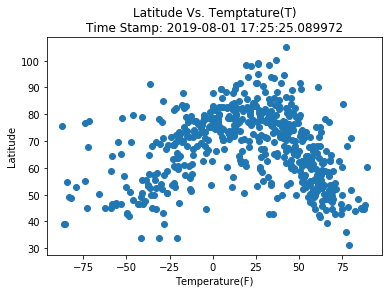

In [12]:
#Latitude Vs Temprature Plot

from matplotlib import pyplot as plt
y= Complete_WeatherDF.Temp
x = Complete_WeatherDF.Lat
plt.scatter(x,y,marker = 'o')
#plt.title(f"Temperature(F) vs. Latitude\nTime Stamp: {ts}")
plt.title(f"Latitude Vs. Temptature(T)\nTime Stamp: {ts}")
plt.ylabel('Latitude')
plt.xlabel('Temperature(F)')
plt.savefig('WeatherPy_Temp.vs.Lat.png')
plt.show()

#### Latitude vs. Humidity Plot

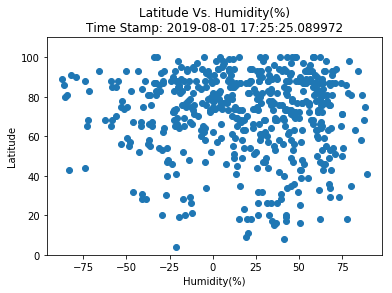

In [13]:
#Latitude Vs. Humidity Plot
y = Complete_WeatherDF.Humidity
x = Complete_WeatherDF.Lat
plt.scatter(x,y,marker = 'o')
#plt.title(f'Humidity(%) vs. Latitude\nTime Stamp: {ts}')
plt.title(f"Latitude Vs. Humidity(%)\nTime Stamp: {ts}")
plt.ylabel('Latitude')
plt.xlabel('Humidity(%)')
### Note for ylim - I added the ylim because sometimes a city would pull back a humidity percentage that was greater than
### 100% and it would distort the visualization...
plt.ylim(0,110)
plt.savefig('WeatherPy_Humidity.vs.Lat.png')
plt.show()

#### Latitude vs. Cloudiness Plot

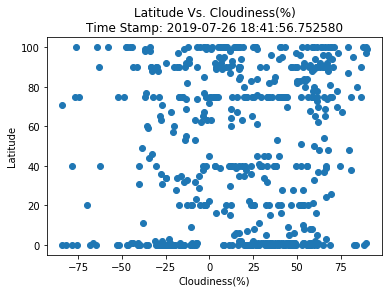

In [12]:
#Latitude Vs. Cloudiness Plot
y = Complete_WeatherDF.Cloudiness
x = Complete_WeatherDF.Lat
plt.scatter(x,y,marker = 'o')
plt.title(f"Latitude Vs. Cloudiness(%)\nTime Stamp: {ts}")
plt.ylabel('Latitude')
plt.xlabel('Cloudiness(%)')
plt.savefig('WeatherPy_Cloudiness.vs.Lat.png')
plt.show()

#### Latitude vs. Wind Speed Plot

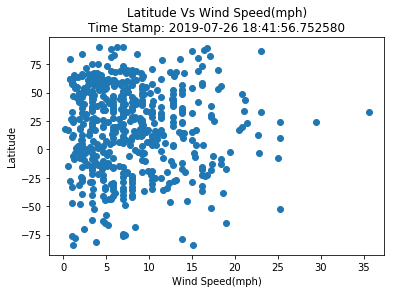

In [13]:
#Latitude Vs. Wind Speed Plot 
x = Complete_WeatherDF['Wind Speed']
y = Complete_WeatherDF.Lat
plt.scatter(x,y,marker = 'o')
plt.title(f"Latitude Vs Wind Speed(mph)\nTime Stamp: {ts}")
plt.ylabel('Latitude')
plt.xlabel('Wind Speed(mph)')
plt.savefig('WeatherPy_WindSpeed.vs.Lat.png')
plt.show()